In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import necessary Surprise Libraries

In [45]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import  cross_validate

# 1. Read and Explore the Data set

In [4]:
df = pd.read_csv("ratings_Electronics.csv", names=['userId', 'productId', 'rating','timestamp'])

In [6]:
df.shape

(7824482, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
rating       float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [8]:
df.isna().sum()

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

In [9]:
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [10]:
print("Unique Products : ", len(df['productId'].unique()))

Unique Products :  476002


In [11]:
print("Unique Users : ", len(df['userId'].unique()))

Unique Users :  4201696


In [12]:
print("Unique Ratings : ", df['rating'].unique())

Unique Ratings :  [5. 1. 3. 2. 4.]


In [39]:
print(" Products count by rating :\n ",df['rating'].value_counts())

 Products count by rating :
  5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: rating, dtype: int64


# 2. Identify the subset of data where users given atleast 50 ratings

In [13]:
df_grouped = df.groupby(by='userId',as_index=False).count()

In [14]:
df_grouped.head()

,userId,productId,rating,timestamp
0,A00000262KYZUE4J55XGL,1,1,1
1,A000063614T1OE0BUSKUT,2,2,2
2,A00009182QVLSWIGHLS1B,1,1,1
3,A00009661LC9LQPGKJ24G,1,1,1
4,A00010809P09NUU6ZP6H,1,1,1


In [15]:
#df_filtered = df_grouped[df_grouped['rating'] > 50]
df_filtered_users = df_grouped[df_grouped['rating'] > 50]['userId']

In [18]:
df_filtered_users.shape

(1466,)

In [19]:
#df.loc[df['userId'].isin(df_filtered['userId'])]
df_final = df.loc[df['userId'].isin(df_filtered_users)]

In [20]:
df_final.shape

(122171, 4)

In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122171 entries, 118 to 7824444
Data columns (total 4 columns):
userId       122171 non-null object
productId    122171 non-null object
rating       122171 non-null float64
timestamp    122171 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.7+ MB


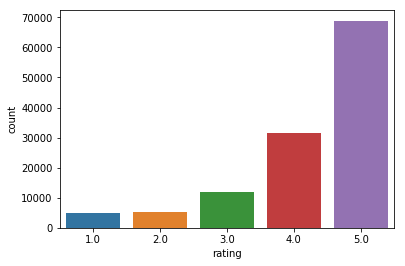

In [34]:
sns.countplot(df_final['rating'])

In [42]:
print("========== Data Distribution on the filtered data set ==========")
print("Unique Products : ", len(df_final['productId'].unique()))
print("Unique Users : ", len(df_final['userId'].unique()))
print("Unique Ratings : ", df_final['rating'].unique())
print("Products count by rating :")
print(df_final['rating'].value_counts())

========== Data Distribution on the filtered data set ==========
Unique Products :  47155
Unique Users :  1466
Unique Ratings :  [3. 1. 4. 5. 2.]
Products count by rating :
5.0    68872
4.0    31480
3.0    11747
2.0     5175
1.0     4897
Name: rating, dtype: int64


# 3. Split the data set

In [22]:
reader = Reader(rating_scale=(1,5))

In [23]:
data = Dataset.load_from_df(df_final[['userId', 'productId', 'rating']], reader)

In [24]:
trainset, testset = train_test_split(data, test_size=0.3)

# 4 Build User-User based collaborative model

In [68]:
knn_cos_algo = KNNWithMeans(k=60, sim_options={'name':'cosine', 'user_based': True})

In [69]:
knn_cos_algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [70]:
test_cos_pred = knn_cos_algo.test(testset)

In [71]:
print("Accuracy Score (Cosine Similarity): ",accuracy.rmse(test_cos_pred, verbose=True))

RMSE: 1.0619
Accuracy Score (Cosine Similarity):  1.0619204950893597


In [54]:
test_cos_pred

[Prediction(uid='A1M7HP5CHDXXOU', iid='B002NZG4BE', r_ui=4.0, est=4.262725242343807, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A38KK0SZYEH5UD', iid='B000VJX7DW', r_ui=5.0, est=4.887211324854266, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='A257X1MQJO82P2', iid='B004HREPCQ', r_ui=5.0, est=4.2599681020733655, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A1TQZUSOU22E9M', iid='B00E38BR8O', r_ui=5.0, est=4.611111111111111, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2R1HUYHXV7H18', iid='B002U6EWPG', r_ui=5.0, est=3.453402366863905, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A3Q6ZPW60CVF2L', iid='B006Z394L2', r_ui=3.0, est=3.65, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A6VXZ1EEPRTLV', iid='B001TOD7ME', r_ui=5.0, est=4.131021833996756, details={'actual_k': 11, 'was_impossible': False}),
 Prediction(uid='A110VKXAVLAYKY', i

In [100]:
knn_pearson_algo = KNNWithMeans(k=20, min_k=3, sim_options={'name':'pearson', 'user_based': True})

In [101]:
knn_pearson_algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [102]:
test_pearson_pred = knn_pearson_algo.test(testset)

In [103]:
print("Accuracy Score (Pearson Similarity): ",accuracy.rmse(test_pearson_pred, verbose=True))

RMSE: 1.0242
Accuracy Score (Pearson Similarity):  1.0241868150796636


In [104]:
test_pearson_pred

[Prediction(uid='A1M7HP5CHDXXOU', iid='B002NZG4BE', r_ui=4.0, est=4.262725242343807, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A38KK0SZYEH5UD', iid='B000VJX7DW', r_ui=5.0, est=4.398496240601504, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A257X1MQJO82P2', iid='B004HREPCQ', r_ui=5.0, est=4.684210526315789, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1TQZUSOU22E9M', iid='B00E38BR8O', r_ui=5.0, est=4.611111111111111, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2R1HUYHXV7H18', iid='B002U6EWPG', r_ui=5.0, est=4.625, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3Q6ZPW60CVF2L', iid='B006Z394L2', r_ui=3.0, est=3.65, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A6VXZ1EEPRTLV', iid='B001TOD7ME', r_ui=5.0, est=4.085470085470085, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A110VKXAVLAYKY', iid='B004RBX0GO

In [ ]:
knn_pearson_algo.predict()

# 5 Building Item-Item based collaborative model

In [29]:
knn_item_algo = KNNWithMeans(sim_options={'name':'cosine', 'user_based': False})

In [30]:
knn_item_algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [32]:
test_item_pred = knn_item_algo.test(testset)

In [33]:
accuracy.rmse(test_item_pred, verbose=True)

RMSE: 1.1296


1.1296341271583823